In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# set theme
sns.set()
sns.set(rc={'figure.figsize':(10,8)})
#sns.set_style('darkgrid')

In [2]:
user_cols = ['Date', 'Food', 'Junk food', 'Travel', 'Total Daily Expense', 'Bills', 'Entertainment', 'Shopping', 'Courses']
expenses_18 = pd.read_excel('Expense Tracker.xlsx', sheet_name = '2018', usecols = user_cols)
expenses_18 = expenses_18.fillna(0)
expenses_18['Date'] = pd.to_datetime(expenses_18['Date'])
expenses_18.head()

,Date,Food,Junk food,Travel,Total Daily Expense,Bills,Entertainment,Shopping,Courses
0,2018-09-02,0.0,60.0,0.0,60.0,8127.0,0.0,0.0,0.0
1,2018-09-03,145.0,20.0,20.0,185.0,0.0,0.0,0.0,0.0
2,2018-09-04,113.0,10.0,10.0,133.0,0.0,0.0,0.0,0.0
3,2018-09-05,99.0,29.0,20.0,148.0,0.0,0.0,0.0,0.0
4,2018-09-06,131.0,25.0,10.0,166.0,0.0,201.0,0.0,0.0


In [3]:
user_cols = ['Date', 'Food', 'Junk food', 'Travel', 'Total Daily Expense', 'Bills', 'Entertainment', 'Shopping', 'Courses']
expenses_19 = pd.read_excel('Expense Tracker.xlsx', sheet_name = '2019', usecols = user_cols)
expenses_19 = expenses_19.fillna(0)
expenses_19['Date'] = pd.to_datetime(expenses_19['Date'])
expenses_19.head()

,Date,Food,Junk food,Travel,Total Daily Expense,Bills,Entertainment,Shopping,Courses
0,2019-01-01,75.0,0.0,25.0,100.0,0.0,0.0,6999.0,0.0
1,2019-01-02,88.0,0.0,25.0,113.0,8159.0,0.0,52.0,0.0
2,2019-01-03,97.0,0.0,10.0,107.0,535.0,0.0,0.0,0.0
3,2019-01-04,96.0,0.0,25.0,121.0,0.0,0.0,0.0,0.0
4,2019-01-05,0.0,220.0,40.0,260.0,40.0,0.0,0.0,0.0


To avoid __[pandas valueerror mixed datetimes and integers in passed array](https://stackoverflow.com/a/48180826)__. 

Check whether all int or objec using : `expenses_19['Date'].astype(str).str.isdigit().value_counts() `

Next, apply the function on a subset of the rows using `apply`:

```
from datetime import datetime, timedelta

def from_excel_ordinal(ordinal, _epoch0=datetime(1899, 12, 31)):
    if ordinal > 59:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (_epoch0 + timedelta(days=ordinal)).replace(microsecond=0)

condition = expenses_19['Date'].astype(str).str.isdigit()
df.loc[condition, 'Plan Start Date'] = df.loc[condition, 'Plan Start Date'].astype(int).apply(from_excel_ordinal)
```

In [4]:
df = pd.concat([expenses_18, expenses_19])
df.head()

,Date,Food,Junk food,Travel,Total Daily Expense,Bills,Entertainment,Shopping,Courses
0,2018-09-02,0.0,60.0,0.0,60.0,8127.0,0.0,0.0,0.0
1,2018-09-03,145.0,20.0,20.0,185.0,0.0,0.0,0.0,0.0
2,2018-09-04,113.0,10.0,10.0,133.0,0.0,0.0,0.0,0.0
3,2018-09-05,99.0,29.0,20.0,148.0,0.0,0.0,0.0,0.0
4,2018-09-06,131.0,25.0,10.0,166.0,0.0,201.0,0.0,0.0


In [5]:
df.dtypes

Date                   datetime64[ns]
Food                          float64
Junk food                     float64
Travel                        float64
Total Daily Expense           float64
Bills                         float64
Entertainment                 float64
Shopping                      float64
Courses                       float64
dtype: object

In [6]:
total_expenses = df.loc[:,['Food', 'Junk food', 'Travel','Bills', 'Entertainment', 'Shopping', 'Courses']].sum()
total_expenses

Food             13795.00
Junk food        12302.10
Travel            2285.00
Bills            78265.51
Entertainment     2429.62
Shopping         21746.60
Courses          13030.00
dtype: float64

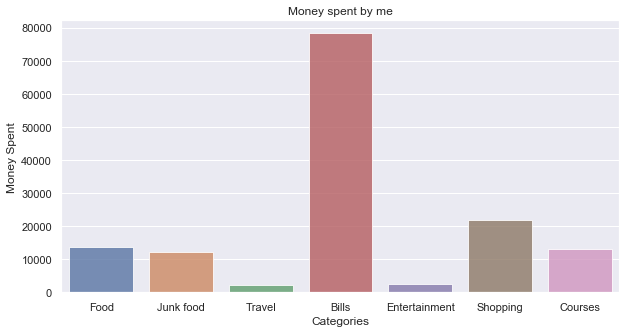

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(total_expenses.index, total_expenses.values, alpha = 0.8)
plt.title('Money spent by me')
plt.ylabel('Money Spent', fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.show();

In [8]:
calc_19 = df.loc[df['Date'].dt.year == 2019, 
                 ['Date','Food', 'Junk food', 'Travel','Entertainment', 'Shopping', 'Courses']]
calc_19.head()

,Date,Food,Junk food,Travel,Entertainment,Shopping,Courses
0,2019-01-01,75.0,0.0,25.0,0.0,6999.0,0.0
1,2019-01-02,88.0,0.0,25.0,0.0,52.0,0.0
2,2019-01-03,97.0,0.0,10.0,0.0,0.0,0.0
3,2019-01-04,96.0,0.0,25.0,0.0,0.0,0.0
4,2019-01-05,0.0,220.0,40.0,0.0,0.0,0.0


In [9]:
calc_19.set_index('Date', inplace = True)
calc_19.head()

,Food,Junk food,Travel,Entertainment,Shopping,Courses
Date,,,,,,
2019-01-01,75.0,0.0,25.0,0.0,6999.0,0.0
2019-01-02,88.0,0.0,25.0,0.0,52.0,0.0
2019-01-03,97.0,0.0,10.0,0.0,0.0,0.0
2019-01-04,96.0,0.0,25.0,0.0,0.0,0.0
2019-01-05,0.0,220.0,40.0,0.0,0.0,0.0


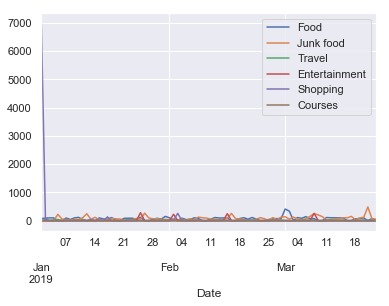

In [10]:
calc_19.plot()